# 二分类，多分类，多标签

In [6]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import f1_score,classification_report,confusion_matrix,accuracy_score,precision_score,recall_score

# 1. 二分类

$F1=\frac{2*precision*recall}{precision+recall}$

   精确率(P) ： $precision=\frac{TP}{TP+FP}$
   
   召回率(R) ： $recall=\frac{TP}{TP+FN}$
 
对于数据测试结果有下面4种情况：
+ 真阳性（TP）: 预测为正， 实际也为正
+ 假阳性（FP）: 预测为正， 实际为负
+ 假阴性（FN）: 预测为负，实际为正
+ 真阴性（TN）: 预测为负， 实际也为负

In [4]:
# positive
y_true = [0, 1, 0, 0, 1, 0, 1, 0, 1, 1]
y_pred = [0, 1, 1, 0, 0, 0, 1, 0, 0, 1]
print(f1_score(y_true,y_pred))

print(classification_report(y_true,y_pred))

0.6666666666666665
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.75      0.60      0.67         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



In [8]:

import matplotlib.pyplot as plt
import itertools
import numpy as np


def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
　　 cm:混淆矩阵值
　　 classes:分类标签
　　 """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

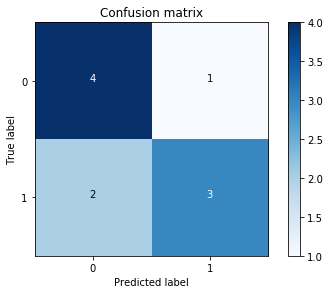

In [9]:
# 计算混淆矩阵
conf_mat=confusion_matrix(y_true,y_pred)
# 画混淆矩阵
plot_confusion_matrix(conf_mat,classes=[0,1])

## 如果Positive=0

In [11]:
TP=conf_mat[0][0]
FP=conf_mat[1][0]
TN=conf_mat[1][1]
FN=conf_mat[0][1]

### Precision

$precision=\frac{T P}{T P+F P}$

In [12]:
precision=TP/(TP+FP)
print('precision:{}'.format(precision))

precision:0.6666666666666666


In [13]:
# skearn 
precision_score(y_true,y_pred,pos_label=0)

0.6666666666666666

### Recall

$recall=\frac{TP}{TP+FN}$

In [14]:
recall=TP/(TP+FN)
print('recall:{}'.format(recall))

recall:0.8


In [15]:
# skearn 
recall_score(y_true,y_pred,pos_label=0)

0.8

### F1

$F1=\frac{2*precision*recall}{precision+recall}$

In [16]:
F1=2*precision*recall/(precision+recall)
print('F1:{}'.format(F1))

F1:0.7272727272727272


In [17]:
# positive=0
f1_score(y_true,y_pred,pos_label=0)

0.7272727272727272

In [18]:
# positive=1
f1_score(y_true,y_pred,pos_label=1)

0.6666666666666665

# 多分类


F1_score中关于参数average的用法描述:
+ 'micro':Calculate metrics globally by counting the total true positives, false negatives and false positives.
+ 'micro':通过先计算总体的TP，FN和FP的数量，再计算F1
+ 'macro':Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
+ 'macro':分布计算每个类别的F1，然后做平均（各类别F1的权重相同）


In [19]:
y_true = [0, 1, 2, 0, 1, 0, 1, 0, 1]
y_pred = [0, 1, 1, 0, 0, 0, 1, 0, 0]
print(classification_report(y_true,y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.667     1.000     0.800         4
           1      0.667     0.500     0.571         4
           2      0.000     0.000     0.000         1

    accuracy                          0.667         9
   macro avg      0.444     0.500     0.457         9
weighted avg      0.593     0.667     0.610         9



/root/ide/anaconda3/envs/tf2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# 报错
# f1_score(y_true,y_pred)

`'macro'`:`Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.`

`'macro'`:分布计算每个类别的F1，然后做平均（各类别F1的权重相同）

In [22]:
print(f1_score(y_true,y_pred,average='macro'))

0.45714285714285713


`'micro'`:`Calculate metrics globally by counting the total true positives, false negatives and false positives.`

`'micro'`:通过先计算总体的TP，FN和FP的数量，再计算F1

In [23]:
print(f1_score(y_true,y_pred,average='micro'))

0.6666666666666666


## 区别

macro-F1平等地看待各个类别，它的值会受到稀有类别的影响；而micro-F1则更容易受到常见类别的影响。

In [171]:
print(f1_score(y_true,y_pred,average='weighted'))

0.6095238095238096


参考：
+ [多分类的评价指标PRF（Macro-F1/MicroF1/weighted）详解] 
https://www.cnblogs.com/nana-zhang/p/11496496.html

+ [sklearn中 F1-micro 与 F1-macro区别和计算原理]
https://www.cnblogs.com/techengin/p/8962024.html

# 神经网络，多分类

## OneHot编码

In [28]:
y_true = [0, 1, 2, 0, 1, 0, 1, 0, 1]
y_pred = [0, 1, 1, 0, 0, 0, 1, 0, 0]

In [29]:
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder

In [30]:
lb = LabelBinarizer()
lb.fit(y_true)
print(lb.classes_)
y_true = lb.transform(y_true)

[0 1 2]


In [31]:
y_pred = lb.transform(y_pred)

In [32]:
y_true

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0]])

In [33]:
f1_score(y_true,y_pred,average='macro')

0.45714285714285713

In [34]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.67      0.50      0.57         4
           2       0.00      0.00      0.00         1

   micro avg       0.67      0.67      0.67         9
   macro avg       0.44      0.50      0.46         9
weighted avg       0.59      0.67      0.61         9
 samples avg       0.67      0.67      0.67         9



# 多标签分类

In [38]:
import tensorflow.keras.backend as K

In [39]:
def micro_f1(y_true, y_pred):
    """
    F1 metric.
    
    Computes the micro_f1 and macro_f1, 
    metrics for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)

    """
    Micro_F1 metric.
    """
    precision = K.sum(true_positives) / (K.sum(predicted_positives) + K.epsilon())
    recall = K.sum(true_positives) / (K.sum(possible_positives) + K.epsilon())
    micro_f1 = 2 * precision * recall / (precision + recall + K.epsilon())
    return micro_f1


def macro_f1(y_true, y_pred):
    """
    F1 metric.

    Computes the micro_f1 and macro_f1,
    metrics for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)

    """
    Macro_F1 metric.
    """
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    macro_f1 = K.mean(2 * precision * recall / (precision + recall + K.epsilon()))

    return macro_f1

In [40]:
y_true=tf.constant([[1, 0, 1],
                   [0, 1, 0],
                   [0, 0, 1],
                   [1, 0, 0],
                   [0, 1, 0],
                   [1, 0, 1],
                   [0, 1, 0],
                   [1, 0, 1],
                   [0, 1, 0]], tf.float32)

y_pred=tf.constant([[1, 0, 0],
                   [1, 1, 0],
                   [0, 0, 1],
                   [1, 0, 0],
                   [0, 1, 0],
                   [1, 0, 0],
                   [0, 1, 1],
                   [1, 0, 0],
                   [0, 1, 0]], tf.float32)

y_prod=tf.constant([[0.6, 0.6, 0.3],
                   [0, 0.8, 0.4],
                   [0.2, 0.6, 0.2],
                   [0.3, 0.5, 0.2],
                   [0.3, 0.4, 0.3],
                   [0.3, 0.4, 0.3],
                   [0.2, 0.4, 0.4],
                   [0.3, 0.4, 0.3],
                   [0.3, 0.5, 0.2]], tf.float32)

In [41]:
print(micro_f1(y_true, y_pred))
print(micro_f1(y_true, y_prod))

tf.Tensor(0.7826087, shape=(), dtype=float32)
tf.Tensor(0.24999996, shape=(), dtype=float32)


In [42]:
print(macro_f1(y_true, y_pred))
print(macro_f1(y_true, y_prod))

tf.Tensor(0.7407407, shape=(), dtype=float32)
tf.Tensor(0.22857137, shape=(), dtype=float32)
